<a href="https://colab.research.google.com/github/llaramar/Challenge_Telecom1/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente


- `Churn`: si el cliente dejó o no la empresa


- `gender`: género (masculino y femenino)


- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años


- `Partner`: si el cliente tiene o no una pareja


- `Dependents`: si el cliente tiene o no dependientes


- `tenure`: meses de contrato del cliente


- `PhoneService`: suscripción al servicio telefónico


- `MultipleLines`: suscripción a más de una línea telefónica


- `InternetService`: suscripción a un proveedor de internet


- `OnlineSecurity`: suscripción adicional de seguridad en línea


- `OnlineBackup`: suscripción adicional de respaldo en línea


- `DeviceProtection`: suscripción adicional de protección del dispositivo


- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera


- `StreamingTV`: suscripción de televisión por cable


- `StreamingMovies`: suscripción de streaming de películas


- `Contract`: tipo de contrato


- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea


- `PaymentMethod`: forma de pago


- `Charges.Monthly`: total de todos los servicios del cliente por mes


- `Charges.Total`: total gastado por el cliente

#📌 Extracción

In [ ]:
import requests
import pandas as pd

url= 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response= requests.get(url)
data = response.json()

df=pd.DataFrame(data)
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
#aplana los datos, los normaliza. desconstruye el json
from pandas import json_normalize
df_normalizado = json_normalize(data)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
 df_normalizado.sample(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
4078,5578-NKCXI,No,Female,0,Yes,Yes,58,Yes,No,Fiber optic,...,Yes,No,No,Yes,Yes,One year,No,Credit card (automatic),99.25,5846.65
4465,6122-LJADA,No,Male,0,Yes,Yes,70,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.15,6237.05
4756,6513-EECDB,Yes,Male,1,Yes,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.55,73.55


In [ ]:
#remplazar puntos por guiones en las columnas de la normalizada
df_normalizado.columns = df_normalizado.columns.str.replace('.','_',regex=False)


In [ ]:
 df_normalizado.sample(2)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
5262,7176-WRTNX,No,Male,0,No,No,70,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.95,7711.25
488,0690-SRQID,No,Male,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.65,67.55


In [ ]:
#convertir columnas object a float
df_normalizado['account_Charges_Total'] = pd.to_numeric(df_normalizado['account_Charges_Total'], errors='coerce')

In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
# Verificar si hay valores unicos en las columnas
for col in df_normalizado.columns:
  print(f"valores unicos en la columna '{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50:
    print(df_normalizado[col].unique())
    print('-' * 50)


valores unicos en la columna 'customerID': 7267
valores unicos en la columna 'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores unicos en la columna 'customer_gender': 2
['Female' 'Male']
--------------------------------------------------
valores unicos en la columna 'customer_SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores unicos en la columna 'customer_Partner': 2
['Yes' 'No']
--------------------------------------------------
valores unicos en la columna 'customer_Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores unicos en la columna 'customer_tenure': 73
valores unicos en la columna 'phone_PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores unicos en la columna 'phone_MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores unicos en la columna 'internet_InternetService': 3
['DSL' 'Fiber o

In [ ]:
#verificando duplicados
duplicados =df_normalizado.duplicated().sum()
print(f'Numero de lineas duplicads: {duplicados}')


Numero de lineas duplicads: 0


In [ ]:
#verificando si har nulos
valores_nulos =df_normalizado.isnull().values.sum()
print('\n Valores nulos por columna:')
print(valores_nulos[valores_nulos > 0])


 Valores nulos por columna:
[11]


In [ ]:
#valores en blanco o vacios
valores_en_blanco_o_vacio =df_normalizado.apply(lambda x: x.astype(str).str.strip()=='').sum()
print('\nvalores en blanco o string vacios por columna')
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


valores en blanco o string vacios por columna
Churn    224
dtype: int64


In [ ]:
#Trataremos los vacios en principio con nan
df_normalizado['Churn'].replace('', pd.NA, inplace=True)
#Hallaremos la moda
mayor_frecuencia_churn = df_normalizado['Churn'].mode()[0]
#remplazamos los nan con la moda
df_normalizado['Churn'].fillna(mayor_frecuencia_churn, inplace=True)

/tmp/ipython-input-1502377511.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_normalizado['Churn'].replace('', pd.NA, inplace=True)
/tmp/ipython-input-1502377511.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
# Verificamos nuevamente valores en blanco o vacios
valores_en_blanco_o_vacio =df_normalizado.apply(lambda x: x.astype(str).str.strip()=='').sum()
print('\nvalores en blanco o string vacios por columna')
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


valores en blanco o string vacios por columna
Series([], dtype: int64)


In [ ]:
#normalizamos etiquetas o campos de variables
df_normalizado.replace({'No phone service': 'No', 'No internet service': 'No'}, inplace=True)

In [ ]:
#lista de columnas binarias a codificar
columnas_binarias = ['Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents',
                     'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity',
                     'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport',
                     'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling']

#diccionario de mapeo para las etiquetas de texto a números
mapeo_codificacion = {'Female': 0, 'Male': 1, 'Yes': 1, 'No': 0}

# Iteramos sobre la lista de columnas y aplicamos el reemplazo
for columna in columnas_binarias:
    df_normalizado[columna] = df_normalizado[columna].replace(mapeo_codificacion)

# Verificamos los cambios
print("DataFrame con columnas binarias codificadas:")
print(df_normalizado[columnas_binarias].head())
print("\nTipos de datos después de la codificación:")
print(df_normalizado[columnas_binarias].info())

DataFrame con columnas binarias codificadas:
   Churn  customer_gender  customer_Partner  customer_Dependents  \
0      0                0                 1                    1   
1      0                1                 0                    0   
2      1                1                 0                    0   
3      1                1                 1                    0   
4      1                0                 1                    0   

   phone_PhoneService  phone_MultipleLines  internet_OnlineSecurity  \
0                   1                    0                        0   
1                   1                    1                        0   
2                   1                    0                        0   
3                   1                    0                        0   
4                   1                    0                        0   

   internet_OnlineBackup  internet_DeviceProtection  internet_TechSupport  \
0                      1                  

In [ ]:
df_normalizado.sample(2)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
173,0270-THENM,0,1,0,1,1,72,1,1,DSL,...,1,1,1,0,0,Two year,0,Bank transfer (automatic),69.85,5102.35
233,0354-VXMJC,0,1,0,1,1,23,1,0,No,...,0,0,0,0,0,Two year,0,Credit card (automatic),19.60,426.65


In [ ]:
df_tratado = df_normalizado.copy()

# Mostrar la información del DataFrame final
print("El DataFrame 'df_tratado' ha sido creado.")
print("\nPrimeras 5 filas:")
print(df_tratado.head())
print("\nTipos de datos de las columnas:")
print(df_tratado.info())

In [ ]:
df_tratado.sample(3)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
2050,2886-KEFUM,1,0,0,1,0,63,1,1,Fiber optic,...,1,1,0,1,1,One year,1,Electronic check,107.50,6873.75
3849,5271-YNWVR,1,1,0,1,1,68,1,1,Fiber optic,...,1,1,1,1,1,Two year,1,Electronic check,113.15,7856.00
6347,8734-DKSTZ,0,0,0,1,1,10,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,0,Electronic check,85.95,858.60


#📊 Carga y análisis

In [ ]:
cant_churn = df_tratado['Churn'].value_counts()
cant_churn


,count
Churn,
0,5398
1,1869


In [ ]:
churn_rate = (churn_counts[1]/len(df_tratado)*100).round(2)
churn_rate

np.float64(25.72)

#📄Informe final

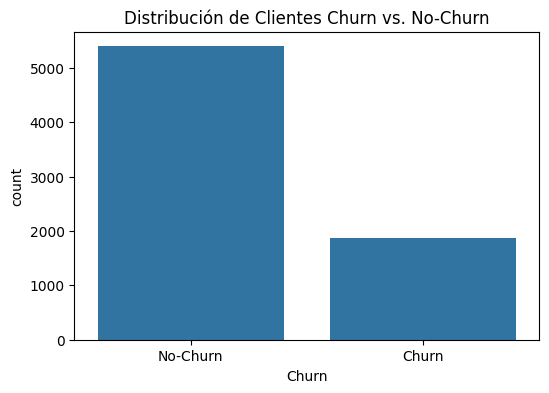

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_tratado)
plt.title('Distribución de Clientes Churn vs. No-Churn')
plt.xticks([0, 1], ['No-Churn', 'Churn'])
plt.show()

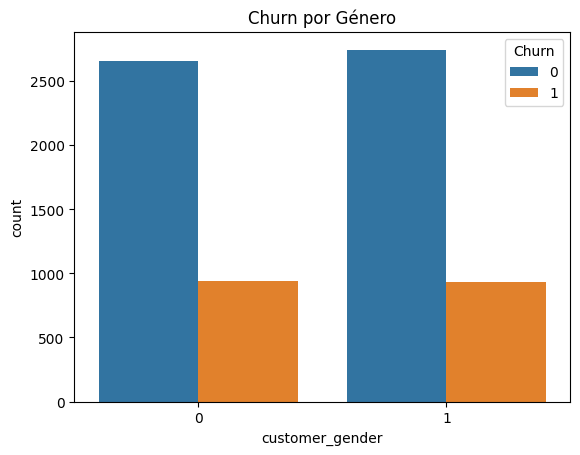

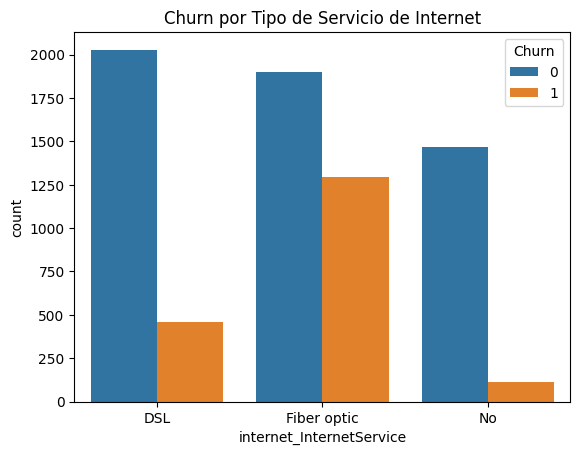

In [ ]:
# Analizar la relación entre 'Churn' y 'customer_gender'
sns.countplot(x='customer_gender', hue='Churn', data=df_normalizado)
plt.title('Churn por Género')
plt.show()

# Analizar la relación entre 'Churn' y 'internet_InternetService'
sns.countplot(x='internet_InternetService', hue='Churn', data=df_normalizado)
plt.title('Churn por Tipo de Servicio de Internet')
plt.show()

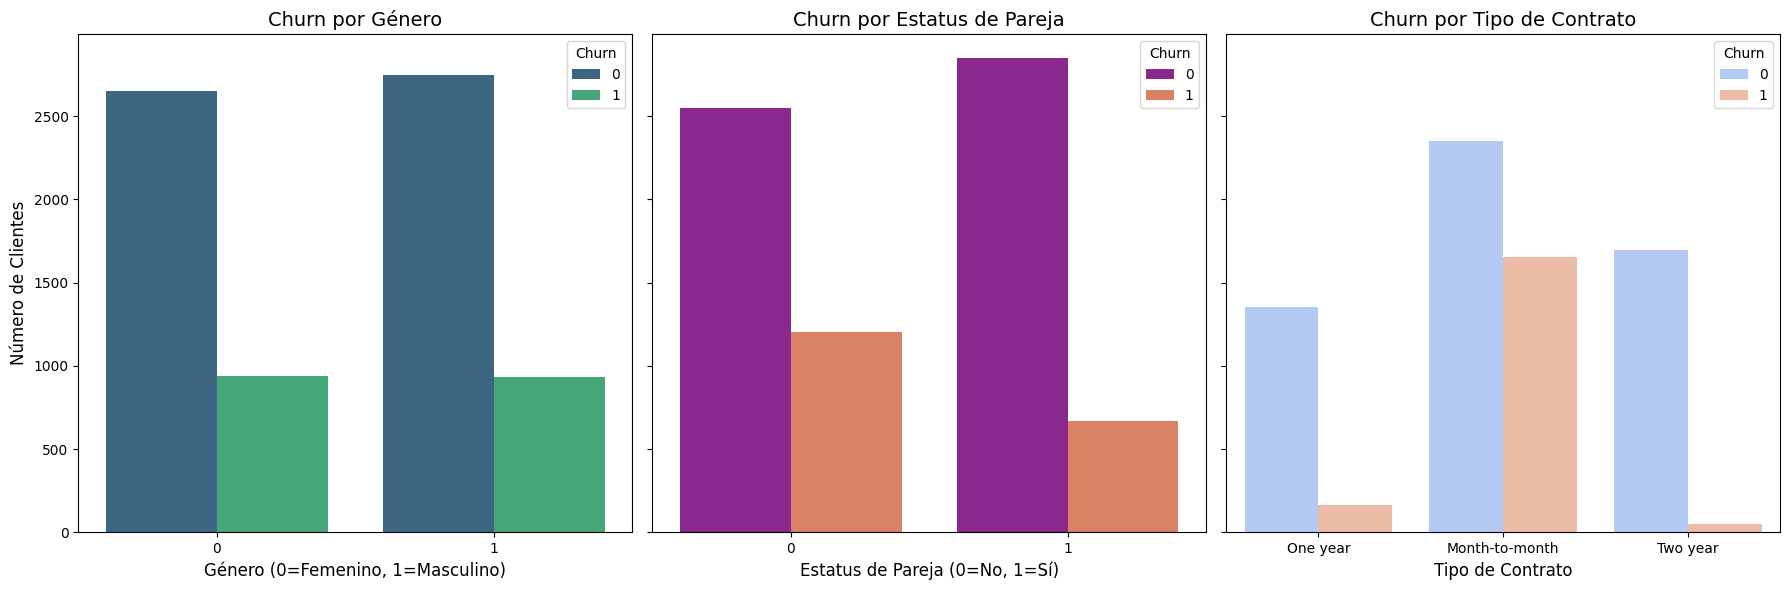

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Gráfico para 'gender'
sns.countplot(x='customer_gender', hue='Churn', data=df_normalizado, palette='viridis', ax=axes[0])
axes[0].set_title('Churn por Género', fontsize=14)
axes[0].set_xlabel('Género (0=Femenino, 1=Masculino)', fontsize=12)
axes[0].set_ylabel('Número de Clientes', fontsize=12)

# Gráfico para 'Partner'
sns.countplot(x='customer_Partner', hue='Churn', data=df_normalizado, palette='plasma', ax=axes[1])
axes[1].set_title('Churn por Estatus de Pareja', fontsize=14)
axes[1].set_xlabel('Estatus de Pareja (0=No, 1=Sí)', fontsize=12)

# Gráfico para 'Contract'
sns.countplot(x='account_Contract', hue='Churn', data=df_normalizado, palette='coolwarm', ax=axes[2])
axes[2].set_title('Churn por Tipo de Contrato', fontsize=14)
axes[2].set_xlabel('Tipo de Contrato', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2523150477.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer_tenure', data=df_normalizado, palette='muted', ax=axes[0])


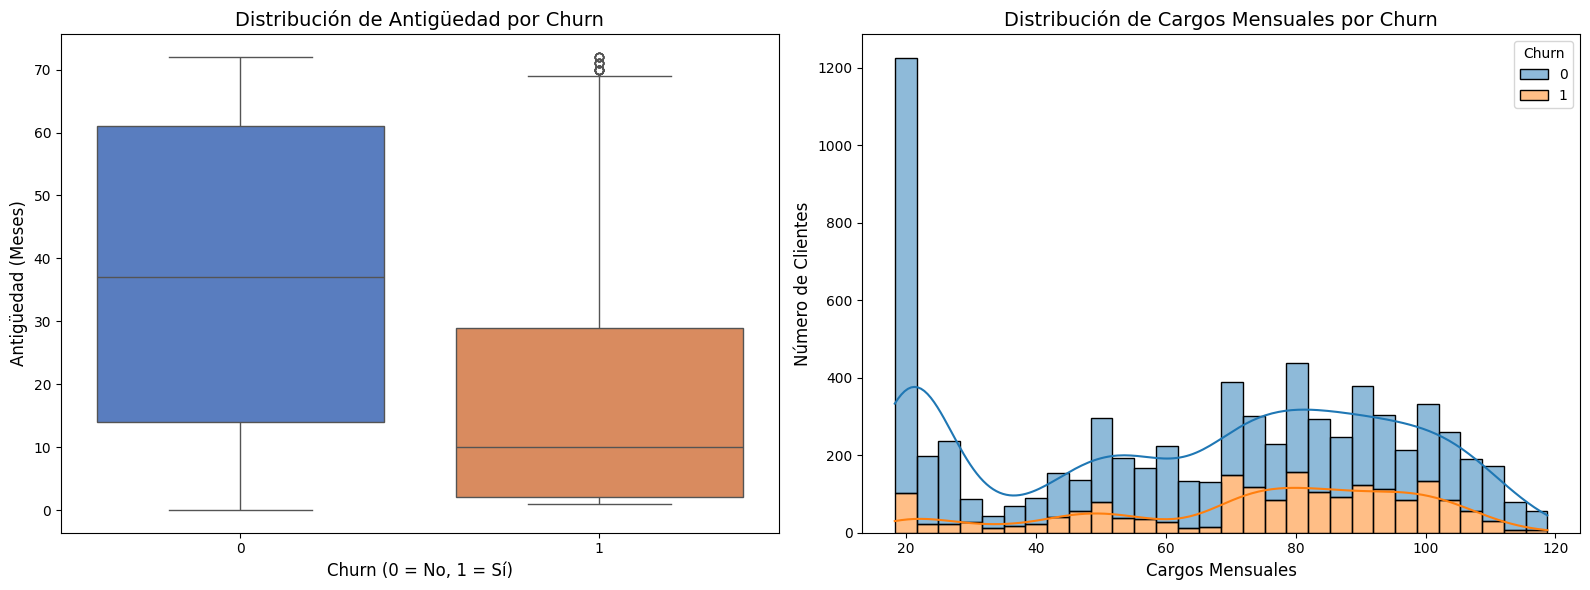

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot para 'tenure'
sns.boxplot(x='Churn', y='customer_tenure', data=df_normalizado, palette='muted', ax=axes[0])
axes[0].set_title('Distribución de Antigüedad por Churn', fontsize=14)
axes[0].set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=12)
axes[0].set_ylabel('Antigüedad (Meses)', fontsize=12)

# Histograma para 'MonthlyCharges'
sns.histplot(data=df_normalizado, x='account_Charges_Monthly', hue='Churn', multiple='stack', bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribución de Cargos Mensuales por Churn', fontsize=14)
axes[1].set_xlabel('Cargos Mensuales', fontsize=12)
axes[1].set_ylabel('Número de Clientes', fontsize=12)

plt.tight_layout()
plt.show()

# Informe
## Introduccion
Se ha tomado la informacion de la evasion en la compañia telefonica TelecomX disponible en archivo json  desde la api suministrada, archivo que exigio ser normalizado ya que contaba con estructuras de datos anidados. posteriormente se realiza la limpieza  y tratamiento  de datos y analisi exploratorio generando algunas conclusiones y recomendaciones.

## Limpieza y tratamiento de datos

* La columna mas importante  del conjunto de datos churn presento  cerca del 3.2% de datos vacios, procediendo a llevarlos a tipo NaN y posteriormente  la imputacion calculando la moda y remplazando dichos campos  por el valor de la moda.
* Se procede a  la asignacion del typo de dato mas adecuado a algunas columnas ejemplo 'account.Charges.Total' que representa el total de los pagos que ha hecho el cliente paso de object a float.

* Se normalizan algunas etiquetas de o campos de algunas variable que mostraban redundancia ejemplo 'No phone service', 'No internet service' que significaba un No

* Las columnas binarias fueron tratadas con label encoding buscando hacer mas sencillo el DataFrame para su posterior analisis


## Analisis exploratorio de datos
Analizamos la  distribucion de la columna Churn para conocer el estado de la evasion que se encuentra cerca del 25% encontrando un desequilibrio en el conjunto de datos





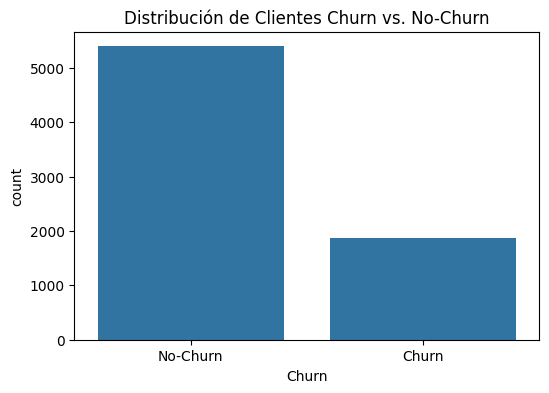

Analizamos la relacion de nuestra columna objetivo Churn con algunas variable categoricas que pueden darnos una vision de la causa de la evasion y talvez el posible deseo de evasion


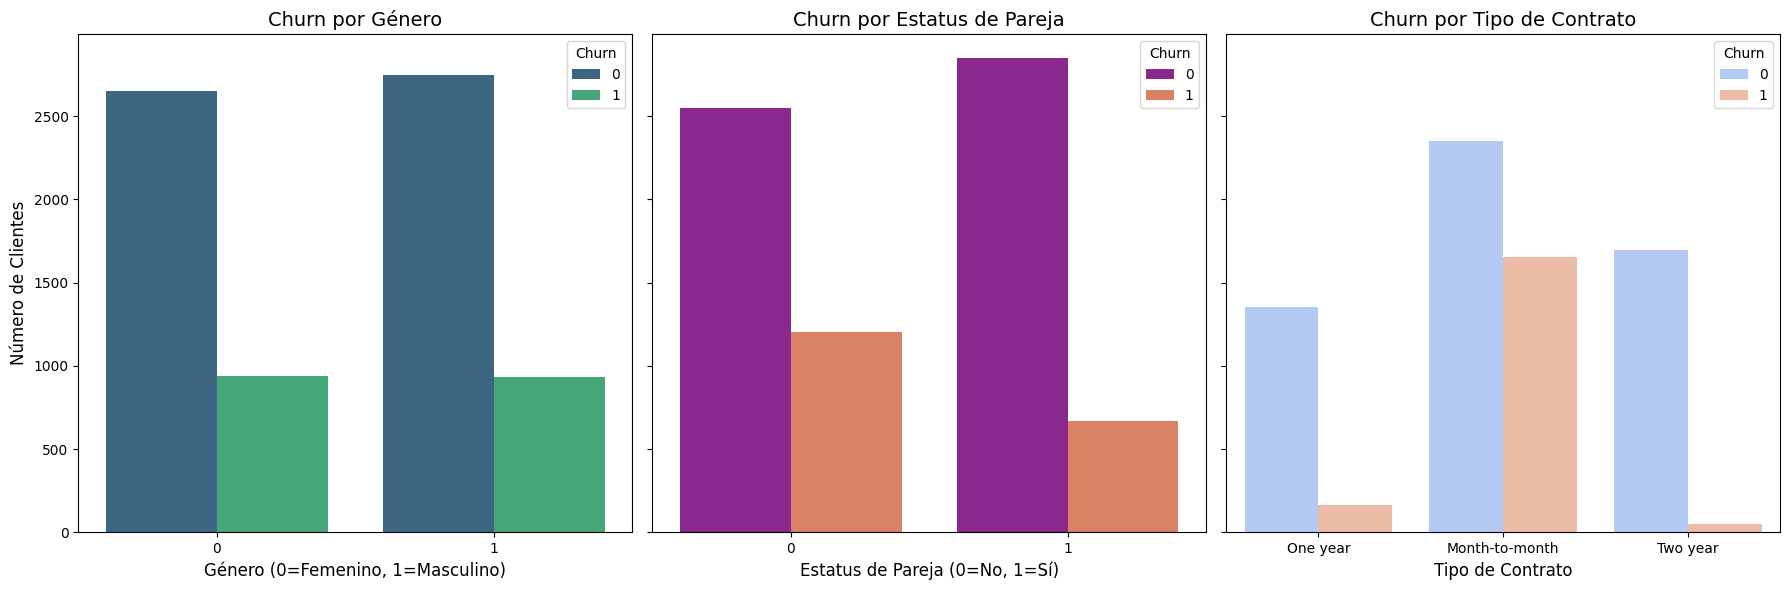

No hay mayor significancia en el comportamiento por genero ya que muestran un comportamiento similar en los gemerps femenino y masculino

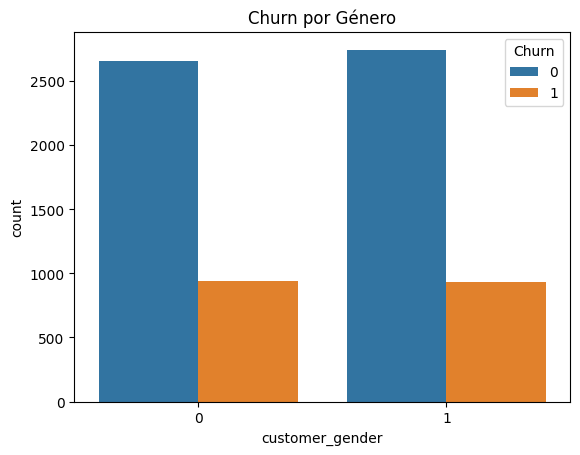

Notamos una gran diferncia en el comportamiento  en la permanencia del servicio internet, siendo la conexion de fibra optica la mas afectada

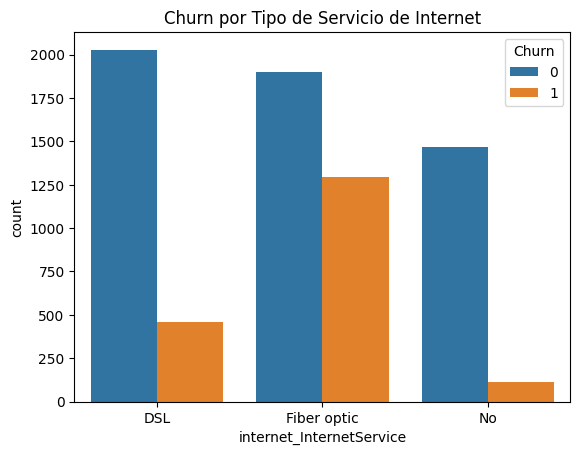

Las evasiones se dan mayormente en periodos cortos de tiempo con una moda de aproximadamente de 1 año en cambio los clientes fidelizados superan los 3 años, tambien vemos que los rangos de precios pueden influir en la evasion o en la retencion



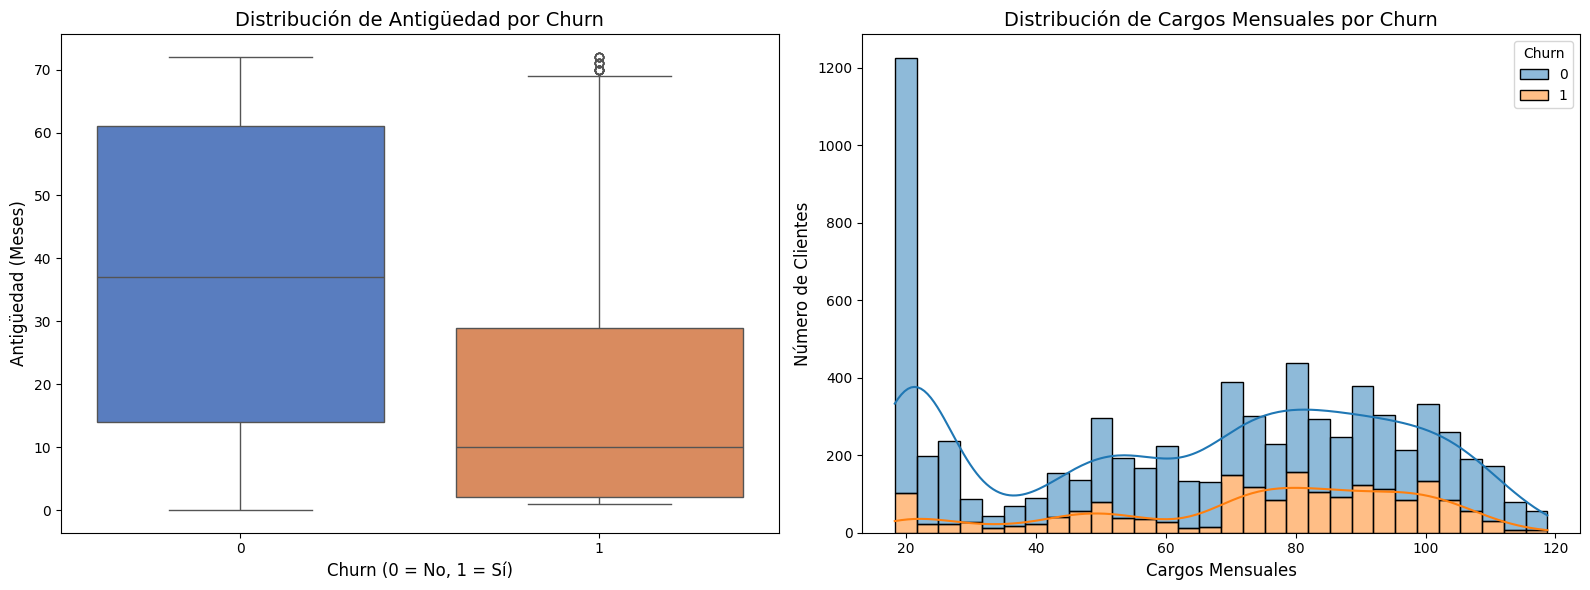

## Conclusiones

Se identifica que se tiene una fidelidad del 75% de los clientes y un 25% porciento de evasion.


La variable genero no tiene ninguna relacion con la evasion que presenta, pero si el estado civil o de pareja, las personas solteras tienden a terminar el contrato con mas facilidad.


Uno de las puntos mas visibles en la evasion es que los contratos mes a mes tienen el mayor porcentaje de evasion en cuanto a tipo de contrato y en cuanto a los servicios de internet la mayor evasion se da en el servicio de fibra optica



## Recomendaciones
Recompensar la fidelidad de los clientes de contratos de largo plazo o que pasen de cierto tiempo.

Incentivar los descuento especiales y trato preferencial en el primer año  para que el cliente se sienta identificado con la compañia

implementar un programa robusto de control de calidad y atencio al usuario principalmente en los servicios de internet

Revisar los costos de los productos y la competencia


